In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import missingno as msno

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Loading loan dataset to pandas

In [2]:
df =pd.read_csv('loan.csv')

C:\Users\U385998\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.shape

(39717, 111)

### Data Exploration and Cleaning

__In this section we are:__

- Removing records with loan status "Current" as they don't help in determining if a loan will default or not
- Cleaning the data based on null values
- Removing the customer behavior metrics that we don't have during loan application

In [4]:
# Removing loans which are currently in progress 
df=df.loc[df.loan_status !='Current']

In [5]:
# Removing Customer behavior columns 

df.drop(columns =['delinq_2yrs','earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d','application_type'], inplace =True)

<AxesSubplot:>

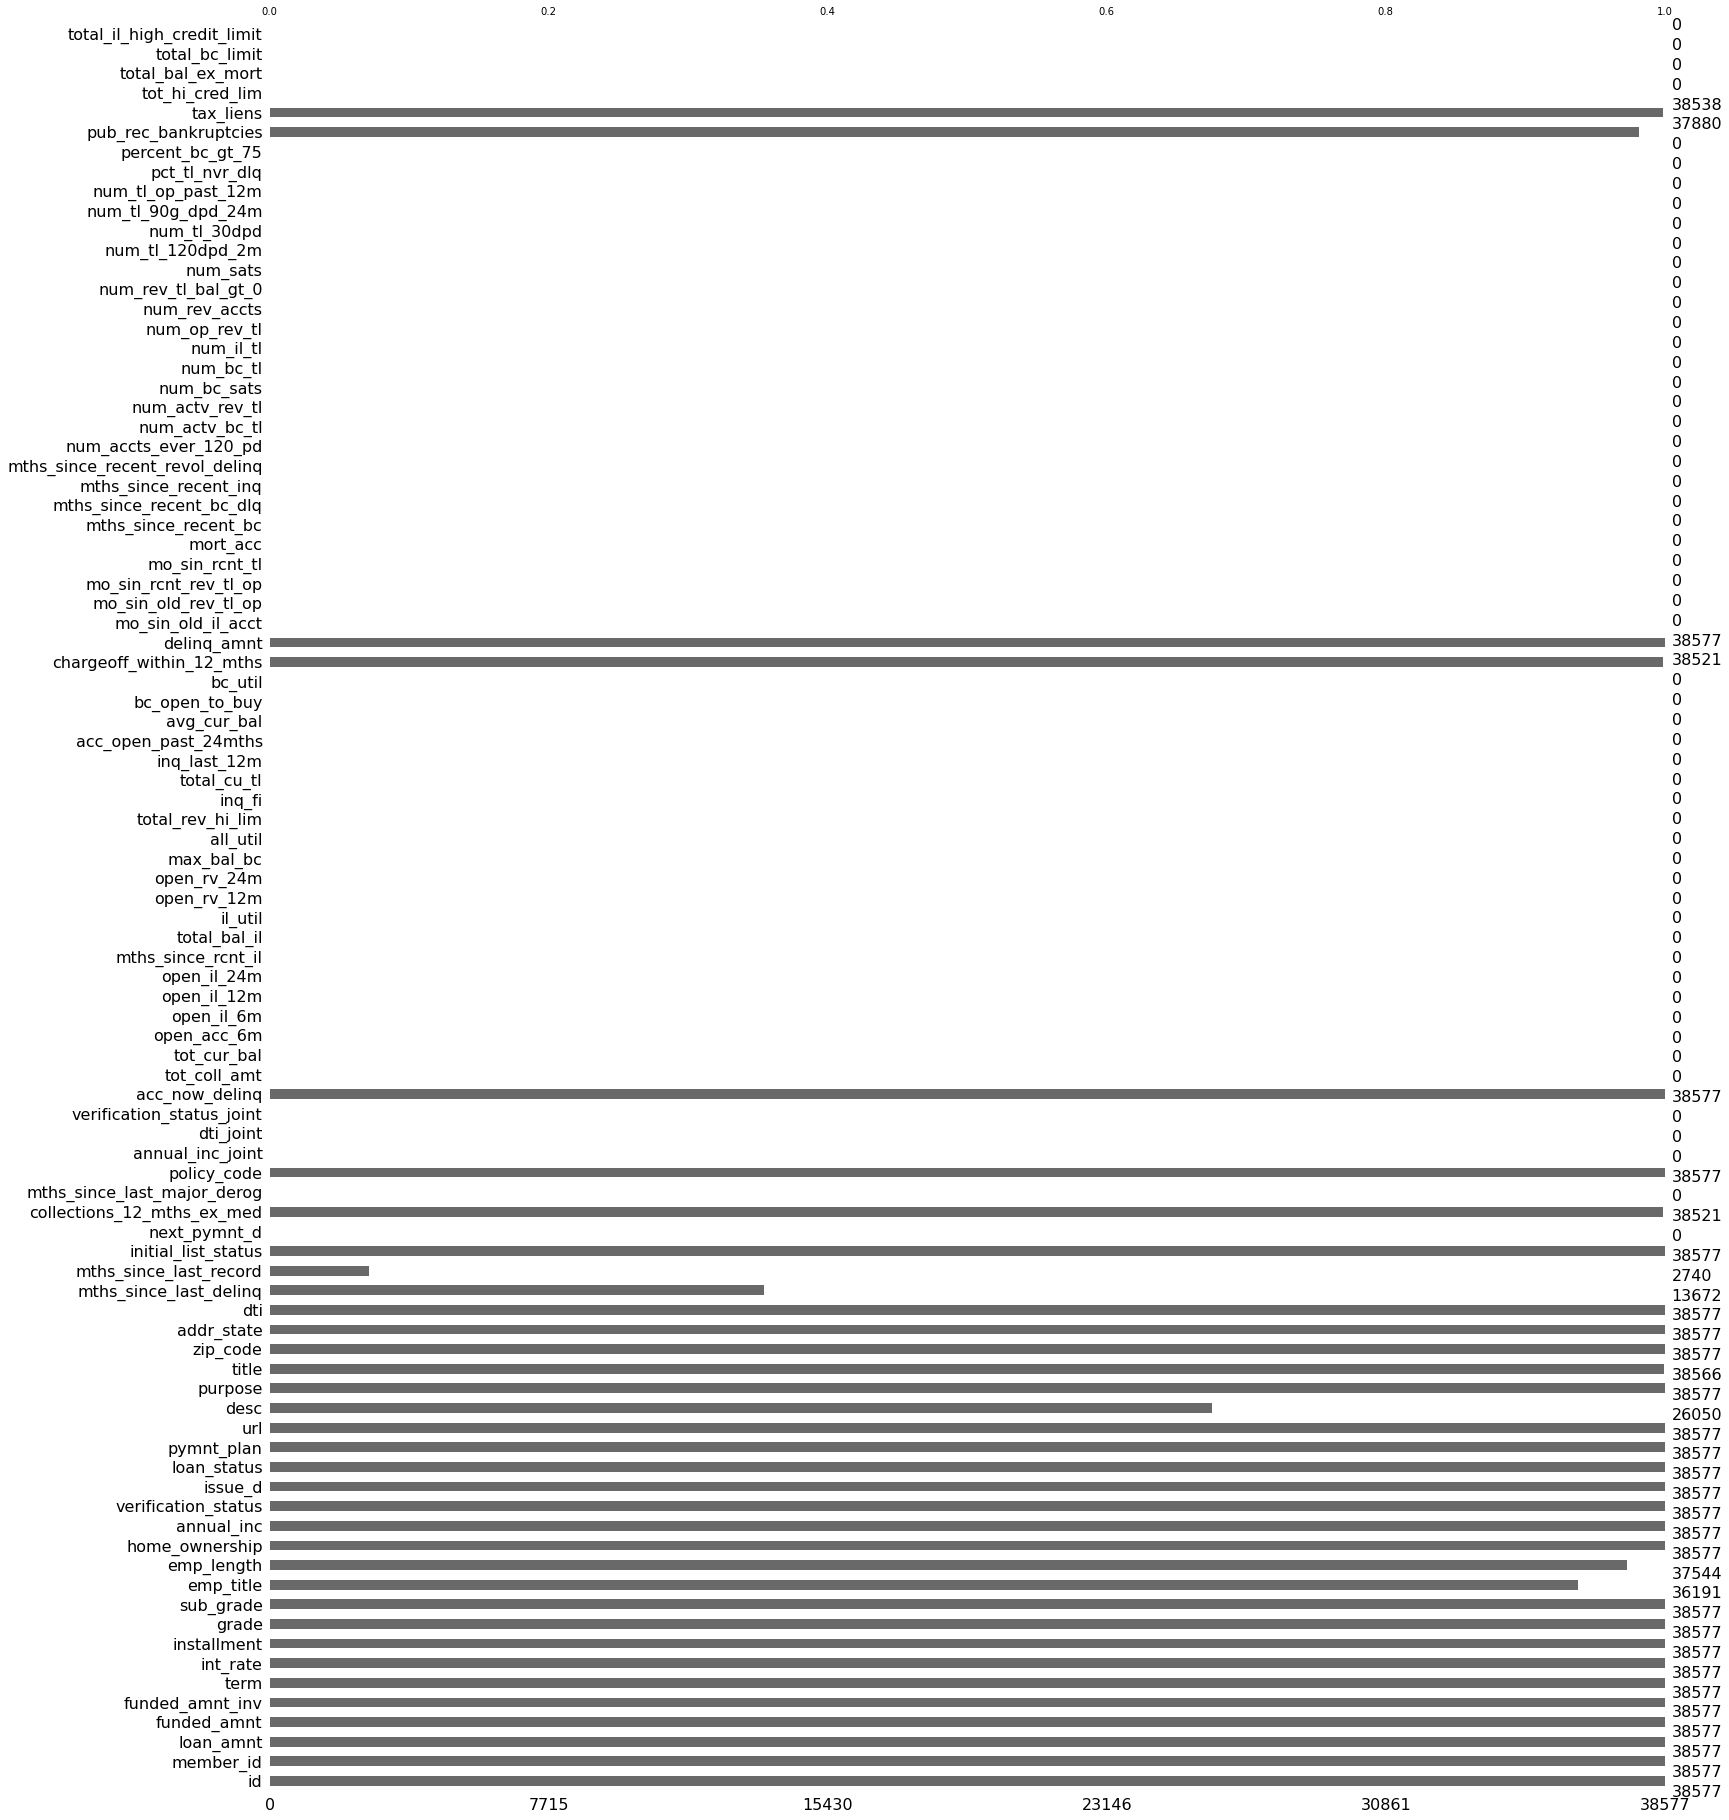

In [6]:
# Visualizing Fill Rate in the data
msno.bar(df)

In [7]:
# Removing columns with high null rate (more than 80%)
nulls =df.isnull().sum()
null_cols =list(nulls[nulls > 0.8*len(df)].index)
not_null_cols =[i for i in df.columns if i not in null_cols]
df =df[not_null_cols]

## Analyzing Categorical Columns

In [8]:
cat_cols =[i for i in df.columns if df[i].dtype =='object']

In [9]:
## Getting the count of unique values for the categorical columns
cat_cols_nunique= {i: df[i].nunique() for i in cat_cols}
cat_cols_nunique

{'term': 2,
 'int_rate': 370,
 'grade': 7,
 'sub_grade': 35,
 'emp_title': 28027,
 'emp_length': 11,
 'home_ownership': 5,
 'verification_status': 3,
 'issue_d': 55,
 'loan_status': 2,
 'pymnt_plan': 1,
 'url': 38577,
 'desc': 25803,
 'purpose': 14,
 'title': 19297,
 'zip_code': 822,
 'addr_state': 50,
 'initial_list_status': 1}

In [10]:
# Removing columns with only one cardinal value 
df.drop(columns =['pymnt_plan','initial_list_status'], inplace=True)

# Removing columns with very high cardinality
df.drop(columns =['emp_title','url','title','desc','zip_code'], inplace =True)

In [11]:
# Data Type processing 

# Converting Interest rate and to float values
df['int_rate'] =df['int_rate'].str.replace("%",'').astype('float')

# # Converting object date columns to date
df['issue_d'] =pd.to_datetime(df['issue_d'],format='%b-%y')

# Converting Term to int
df['term']=df['term'].str.replace(' months', '').astype('int')

## Analyzing Continous Variables

In [12]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,mths_since_last_delinq,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,13672.000,38521.000,38577.000,38577.000,38521.000,38577.000,37880.000,38538.000
mean,676378.707,842284.337,11047.025,10784.059,10222.481,41.898,11.932,322.466,68777.974,13.273,35.883,0.000,1.000,0.000,0.000,0.000,0.043,0.000
std,209263.898,264451.929,7348.442,7090.306,7022.721,10.333,3.691,208.639,64218.682,6.673,22.028,0.000,0.000,0.000,0.000,0.000,0.205,0.000
min,54734.000,70699.000,500.000,500.000,0.000,36.000,5.420,15.690,4000.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,512033.000,661131.000,5300.000,5200.000,5000.000,36.000,8.940,165.740,40000.000,8.130,18.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
50%,656423.000,839292.000,9600.000,9550.000,8733.440,36.000,11.710,277.860,58868.000,13.370,34.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
75%,829146.000,1037336.000,15000.000,15000.000,14000.000,36.000,14.380,425.550,82000.000,18.560,52.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
max,1077501.000,1314167.000,35000.000,35000.000,35000.000,60.000,24.400,1305.190,6000000.000,29.990,120.000,0.000,1.000,0.000,0.000,0.000,2.000,0.000


In [13]:
# Removing continous variables that have only 0 values and ids 

df.drop(columns=['id','member_id','policy_code','acc_now_delinq','collections_12_mths_ex_med','chargeoff_within_12_mths','delinq_amnt','tax_liens'], inplace=True)

# Removing loan_amnt as it not the actual amount issue to the borrower
df.drop(columns =['loan_amnt'], inplace =True)

## Univariate Analysis - Continous Variables

In [14]:
cont_cols =[i for i in df.columns if (df[i].dtype == 'int64' or df[i].dtype =='float64') ]

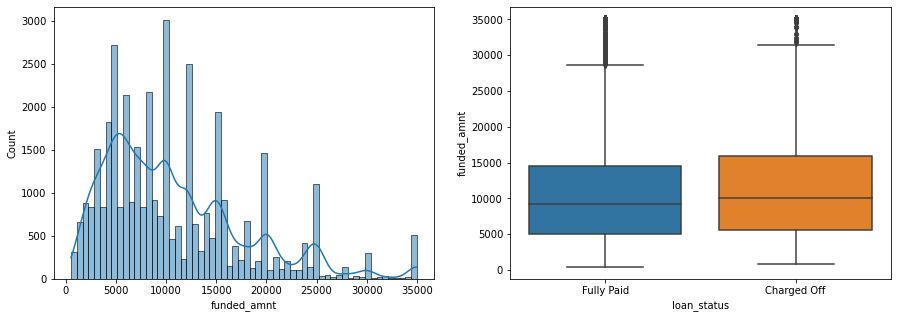

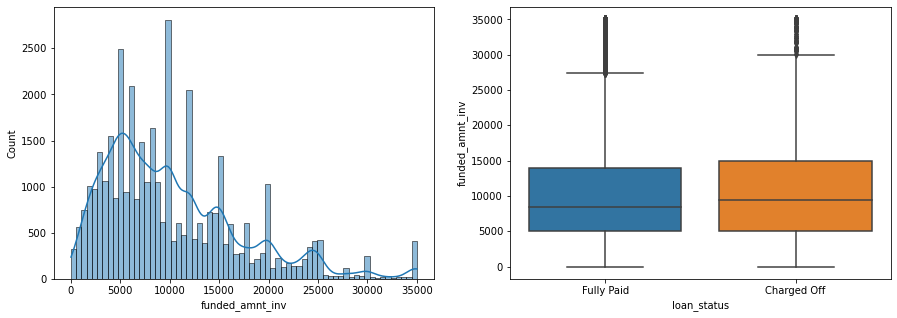

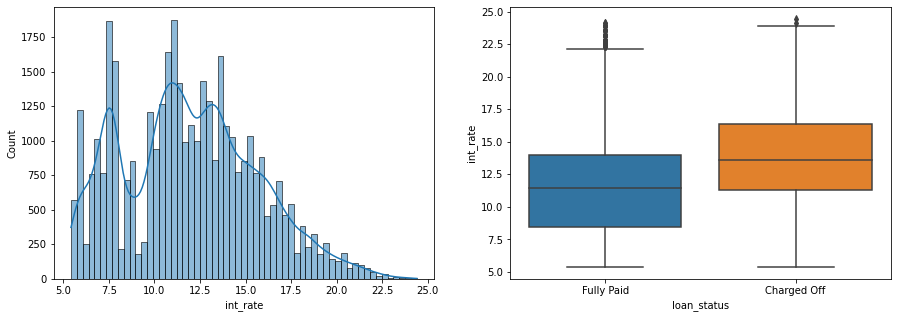

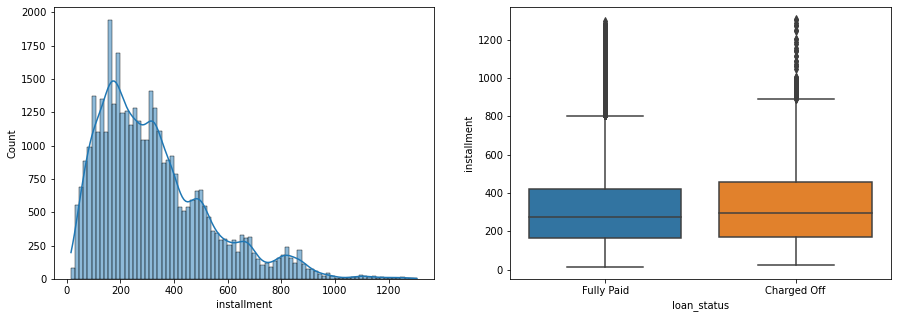

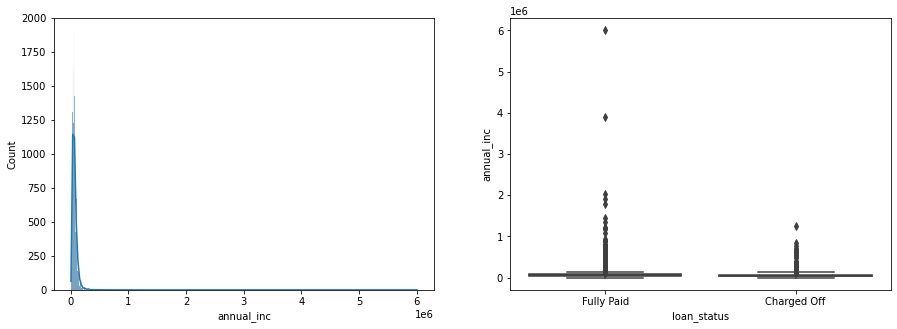

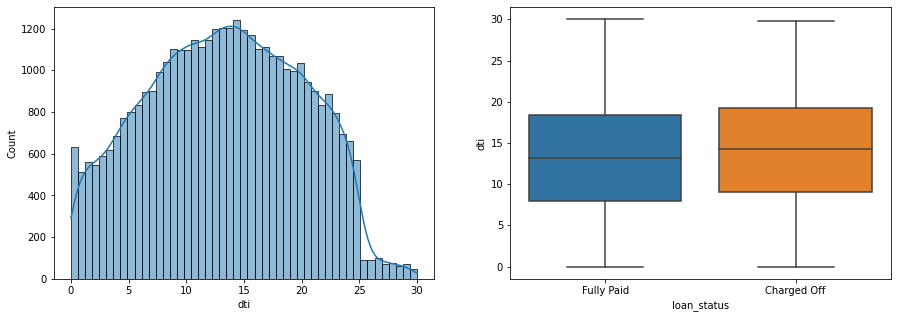

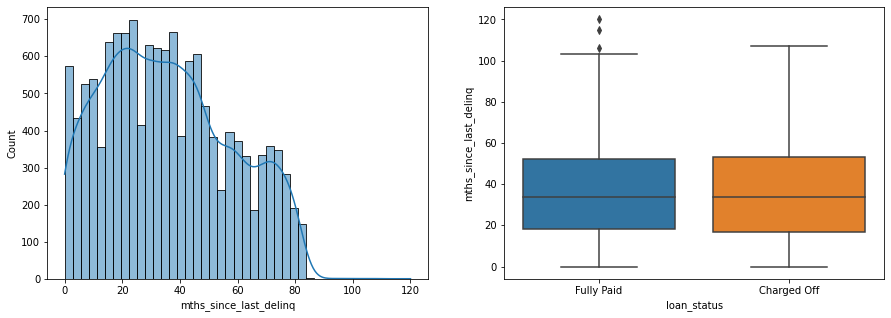

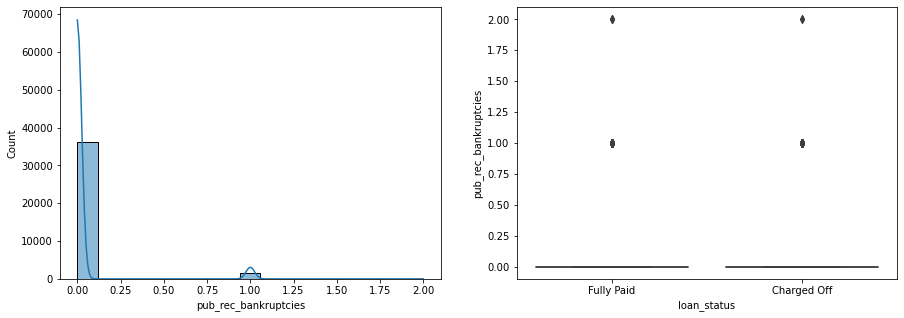

In [15]:
for i in cont_cols:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(x=df[i], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x='loan_status',y=i,data=df)

# Insights:

- Int_rate: Charged off loans have on average higher interest rate than the fully paid loans, if the interest rate is higher than ~14%, the chances of charge off are very high
- A lot of features are quite skewed including annual income, funded_amnt,pub_rec_bankruptcies,etc

# Univariate Analysis - Categorical Variables

In [16]:
cat_cols =[i for i in df.columns if (df[i].dtype == 'object' )]

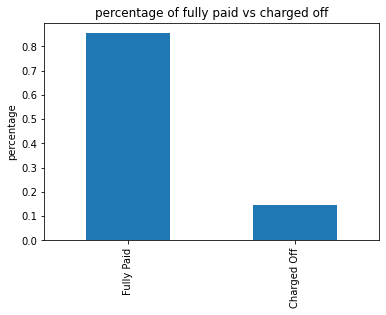

In [17]:
#Percentage of charged off
df.loan_status.value_counts(normalize=True).plot.bar()
plt.ylabel('percentage')
plt.title('percentage of fully paid vs charged off')
plt.show()

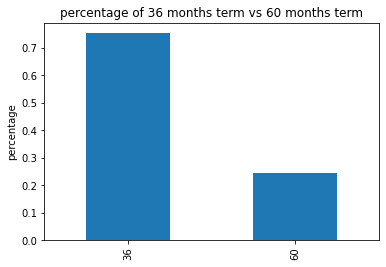

In [18]:
# Percentage Term distribution
df.term.value_counts(normalize=True).plot.bar()
plt.ylabel('percentage')
plt.title('percentage of 36 months term vs 60 months term')
plt.show()

In [19]:
cat_cols = [ i for i in df.columns if i in cat_cols]

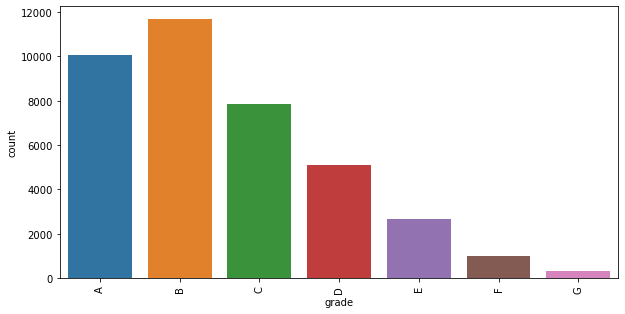

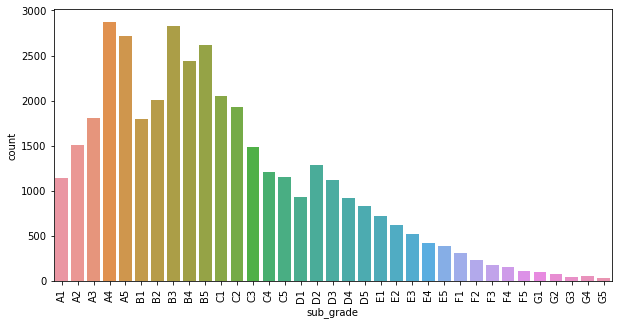

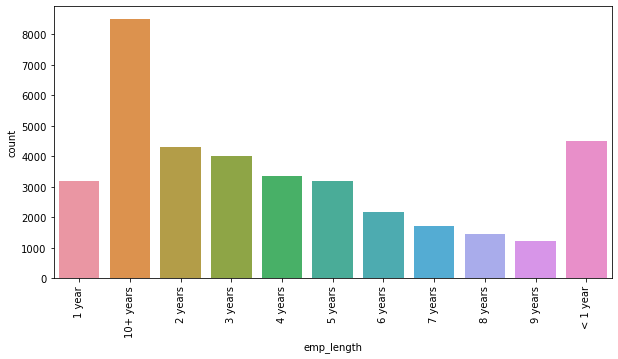

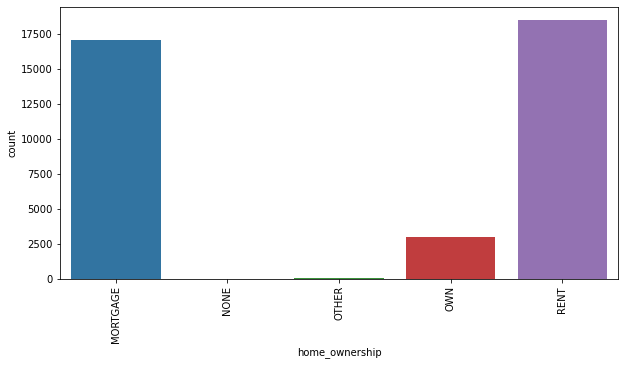

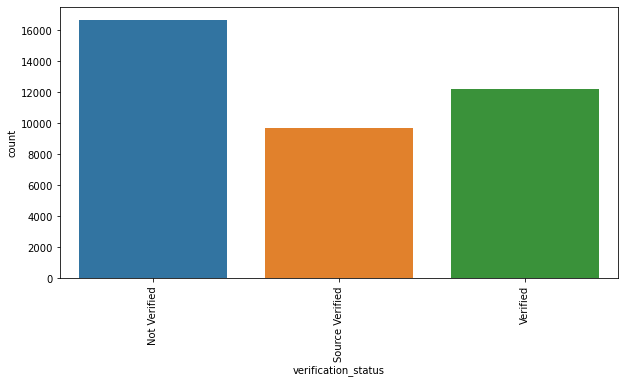

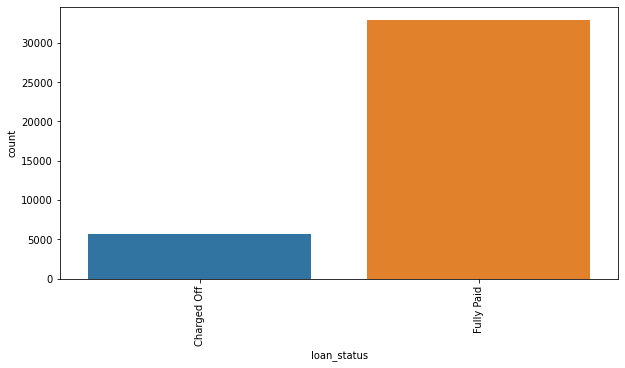

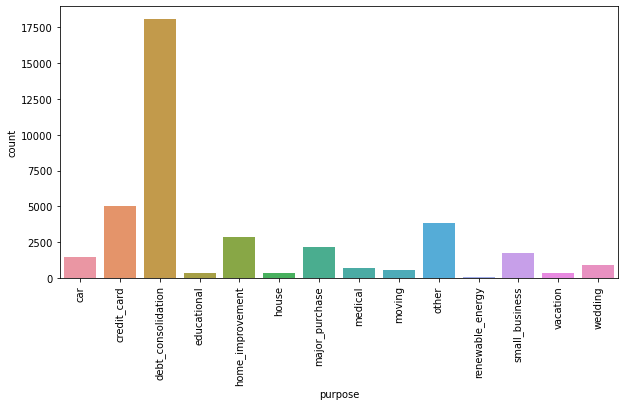

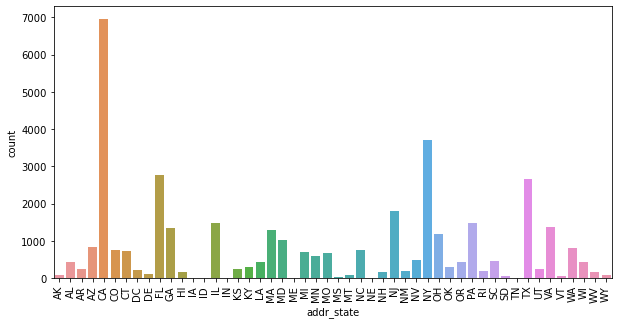

In [20]:
for i in cat_cols:
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=90)
    sns.countplot(x=i, data=df.sort_values(by=i), orient='vert')

# Insights:- 
- There are around 15 percent charged off loans
- 76% of loans term is 36 months rest are 60 months.
- States CA, NY, FL, Tx has highest number of loans.

## Outlier Treatment and Missing Value Imputations

In [21]:
# Treating Outliers in annual income
# Imputing values higher than the 99th percentile to the 99th percentile value
income_99 =df['annual_inc'].quantile(0.99)
df['annual_inc_treated'] =df['annual_inc'].apply(lambda x: x if x<=income_99 else income_99 )

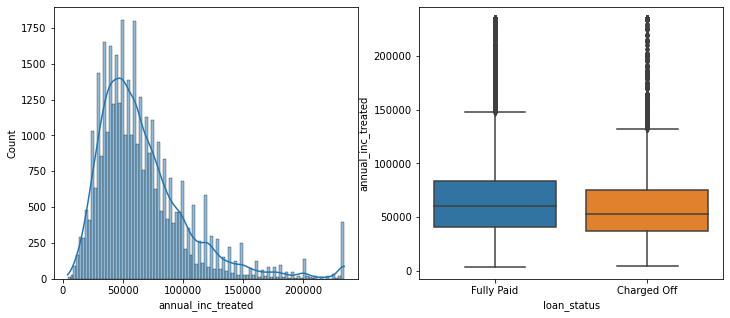

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x=df['annual_inc_treated'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x='loan_status',y='annual_inc_treated',data=df)
plt.show()

In [23]:
# Treating Outliers in installment
# Imputing values higher than the 99th percentile to the 99th percentile value
installment_99 =df['installment'].quantile(0.99)
df['installment'] =df['installment'].apply(lambda x: x if x<=installment_99 else installment_99 )

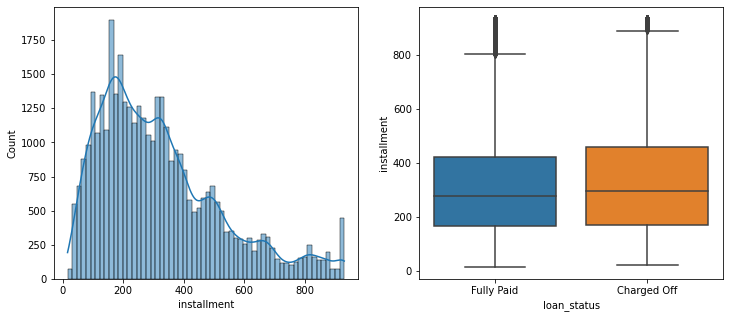

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x=df['installment'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x='loan_status',y='installment',data=df)
plt.show()

In [25]:
# filling missing emp_length values with "Unknown"
df.emp_length.fillna('Unknown', inplace=True)

In [26]:
df.pub_rec_bankruptcies.fillna(value = df.pub_rec_bankruptcies.median(), inplace=True)

# Bivariate and Segmented Analysis

<AxesSubplot:>

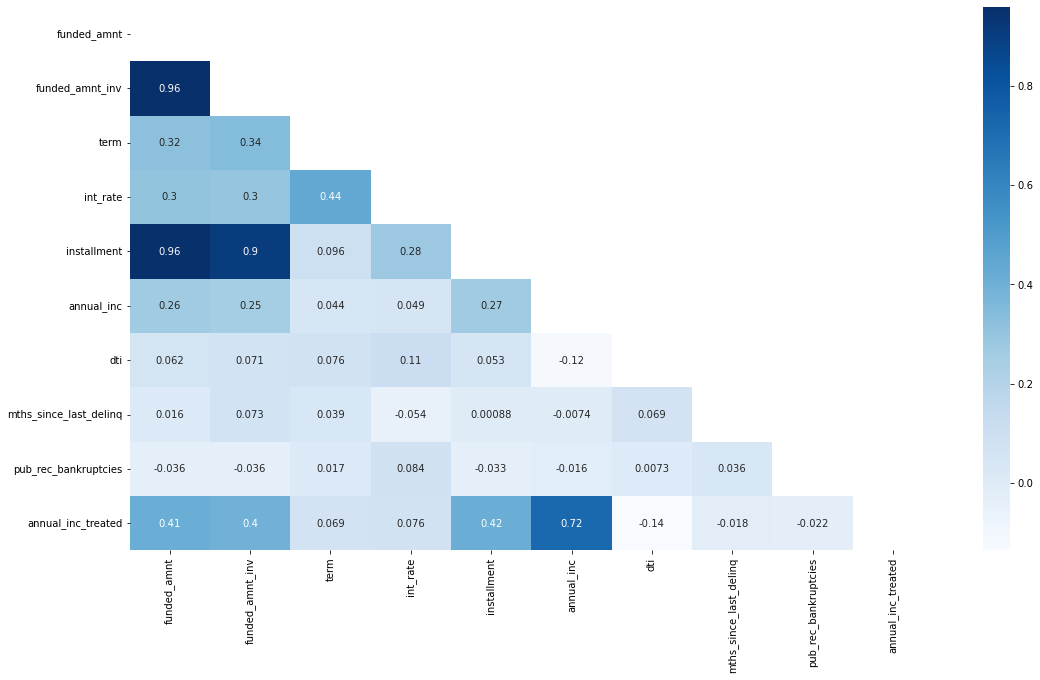

In [27]:
# Studying Correlation between features 
plt.figure(figsize=(18,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap='Blues')

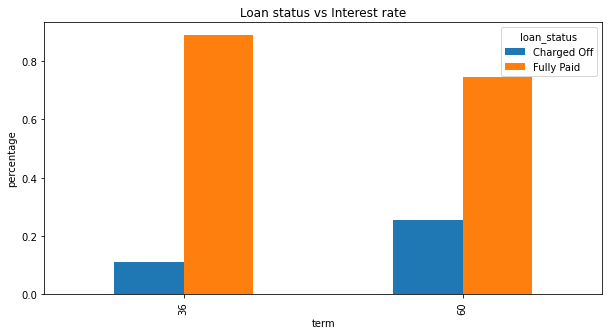

In [28]:
# Percentage distribution of Loan status basis Term

term = df.groupby(['term'])['loan_status'].value_counts(normalize=True).unstack()
term.plot.bar(figsize=(10,5))
plt.title("Loan status vs Interest rate")
plt.ylabel('percentage')
plt.show()

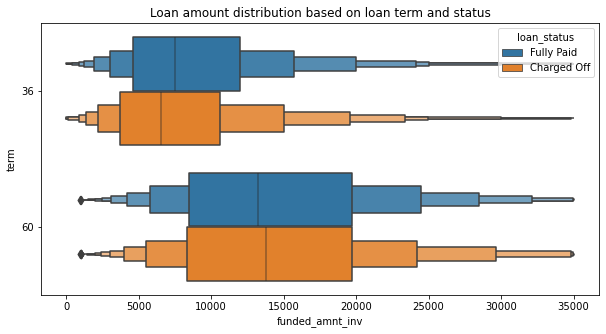

In [29]:
# Distribution of Funded amount and term basis loan status
plt.figure(figsize=(10,5))
sns.boxenplot(x=df.funded_amnt_inv, y= df.term.astype(str), hue=df.loan_status)
plt.title("Loan amount distribution based on loan term and status")
plt.show()

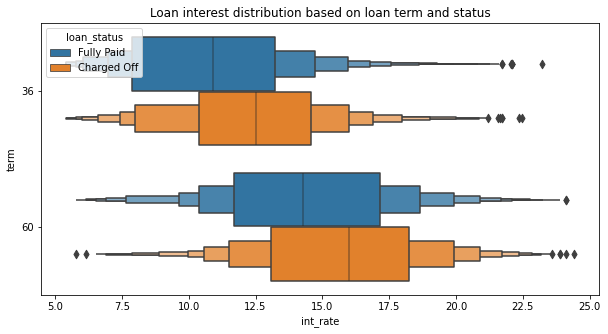

In [30]:
plt.figure(figsize=(10,5))
sns.boxenplot(x=df.int_rate, y= df.term.astype(str), hue=df.loan_status)
plt.title("Loan interest distribution based on loan term and status")
plt.show()

Text(0.5, 1.0, 'Loan status percentage vs interest rate and Term')

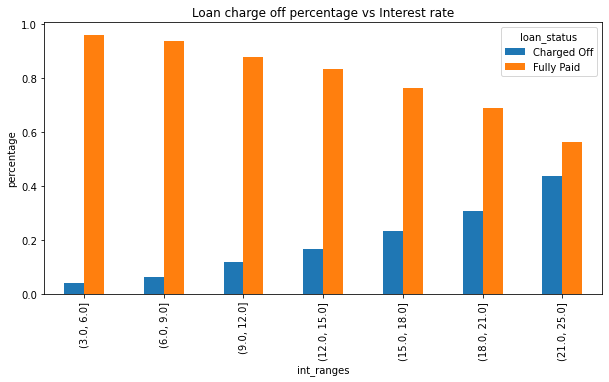

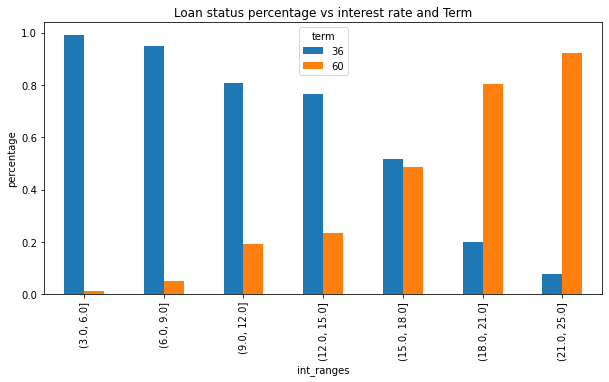

In [31]:
# Distribution of interest rate buckets with loan status and term
df['int_ranges'] = pd.cut(x=df['int_rate'], bins=[3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 25.0])
df.groupby(['int_ranges'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,5))
plt.ylabel('percentage')
plt.title("Loan charge off percentage vs Interest rate")
df.groupby(['int_ranges'])['term'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,5))
plt.ylabel('percentage')
plt.title("Loan status percentage vs interest rate and Term")

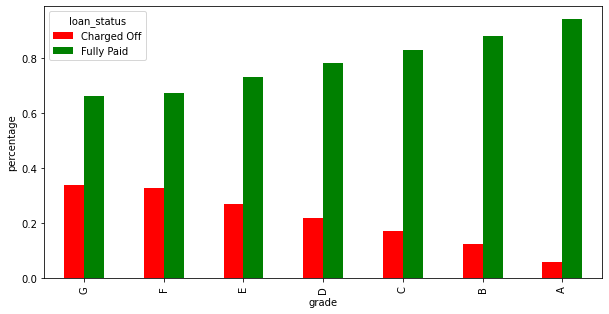

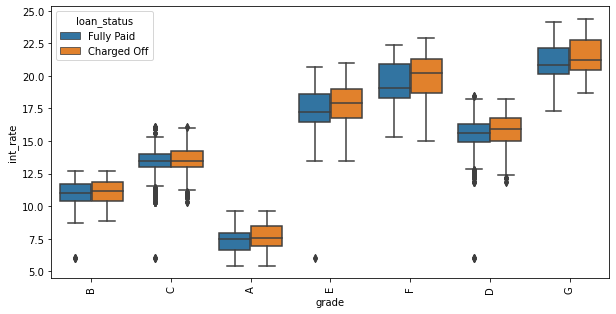

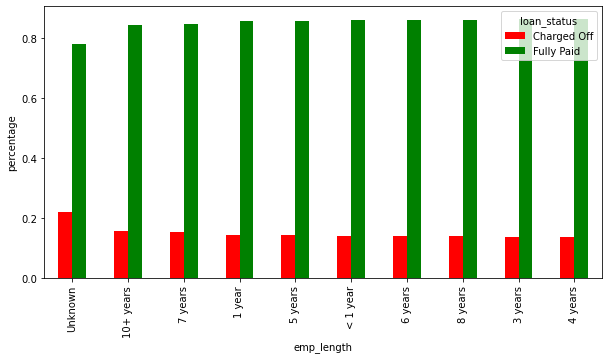

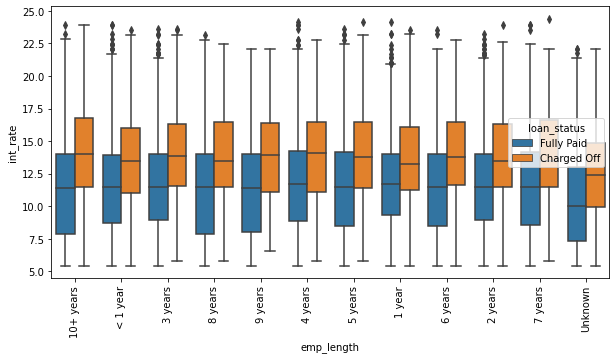

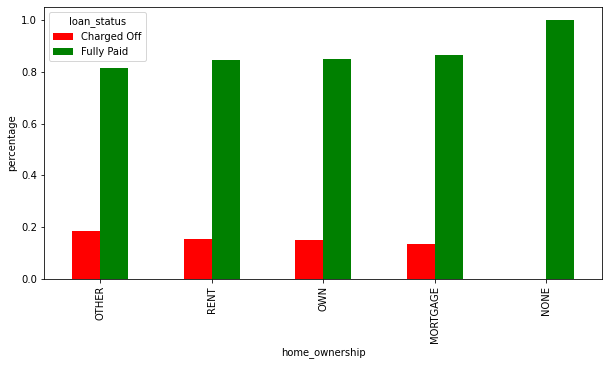

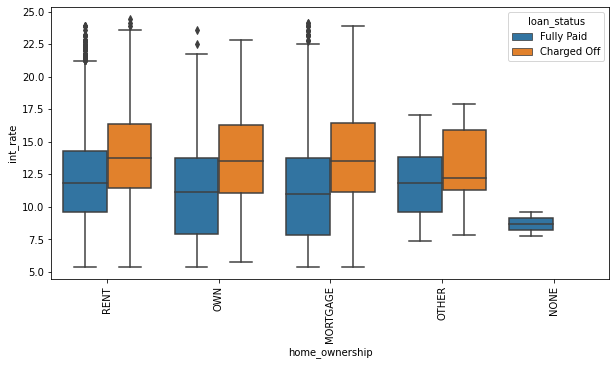

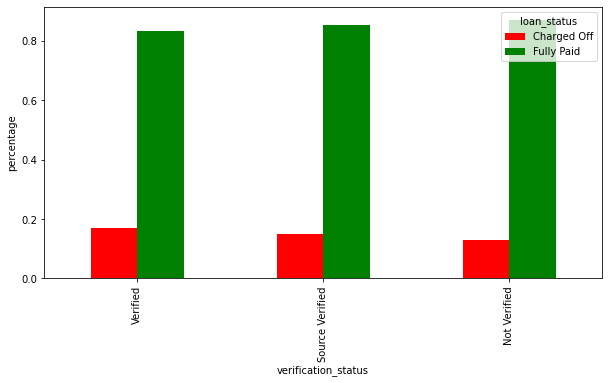

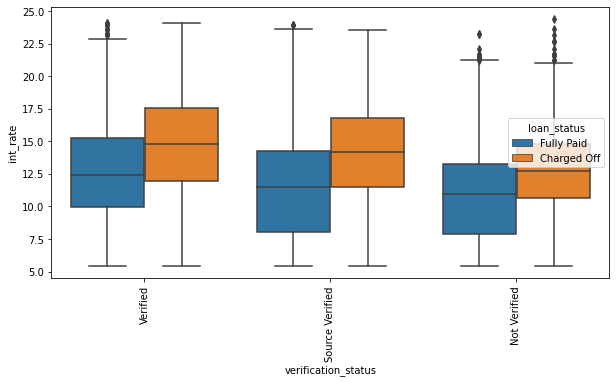

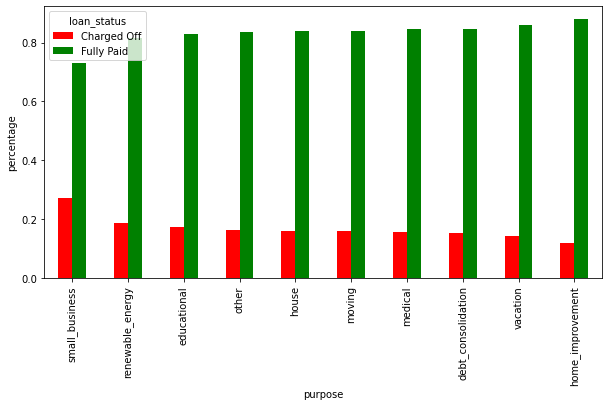

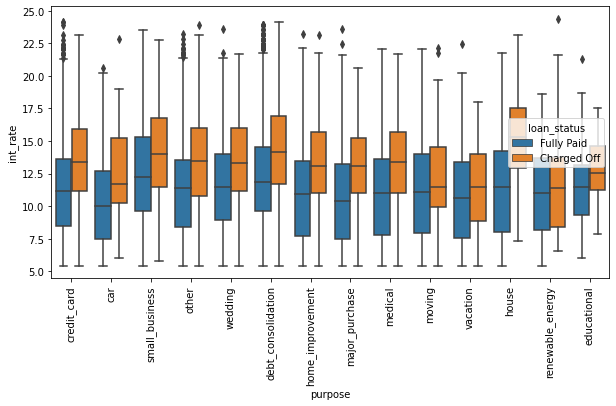

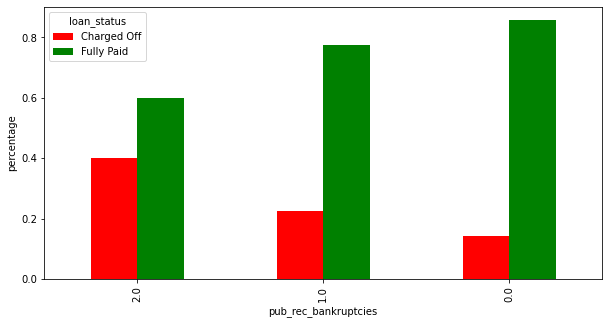

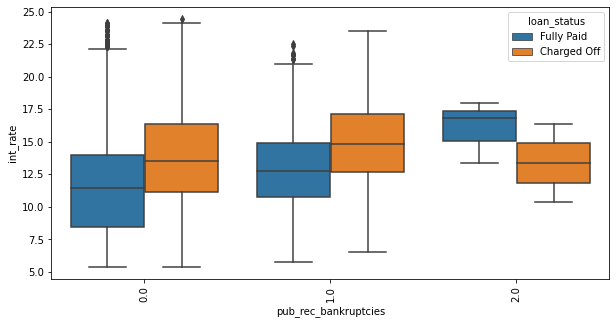

In [32]:
for i in ['grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'pub_rec_bankruptcies']:
    data = df.groupby([i])['loan_status'].value_counts(normalize=True).unstack()
    data = data.sort_values(by='Charged Off', ascending=False).head(10)
    data.plot.bar(figsize=(10, 5), color={"Charged Off": "red", "Fully Paid":"green"})
    plt.ylabel('percentage')
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[i], y= df.int_rate, hue=df.loan_status)
    plt.xticks(rotation=90)
    plt.show()

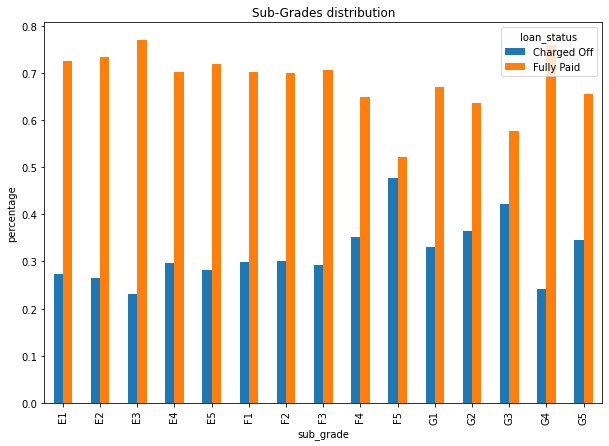

In [33]:
# sub-grade effect on the loan charge off
df[df.grade.isin(['G','F','E'])].groupby(['sub_grade'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,7))
plt.title("Sub-Grades distribution")
plt.ylabel('percentage')
plt.show()

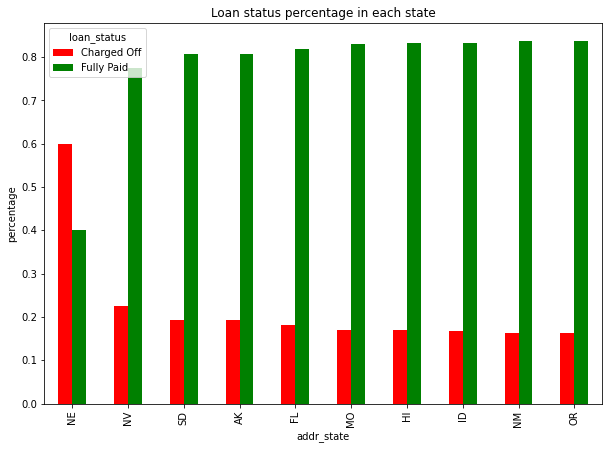

In [34]:
# Some states are prone to charge off 
address_data = df.groupby(['addr_state'])['loan_status'].value_counts(normalize=True).unstack()
address_data = address_data.sort_values(by='Charged Off', ascending=False).head(10)
address_data.plot.bar(figsize=(10, 7), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.title("Loan status percentage in each state")
plt.ylabel('percentage')
plt.show()

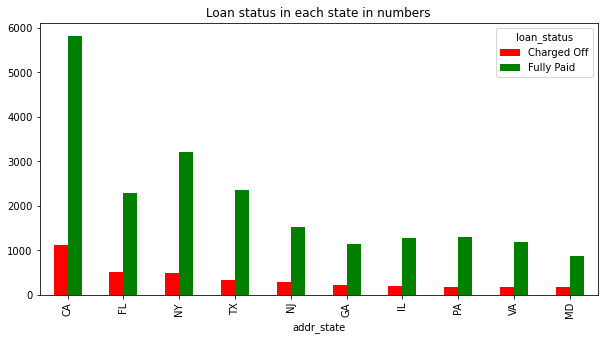

In [35]:
address_data = df.groupby(['addr_state'])['loan_status'].value_counts().unstack()
address_data = address_data.sort_values(by='Charged Off', ascending=False).head(10)
address_data.plot.bar(figsize=(10, 5), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.title("Loan status in each state in numbers")
plt.show()

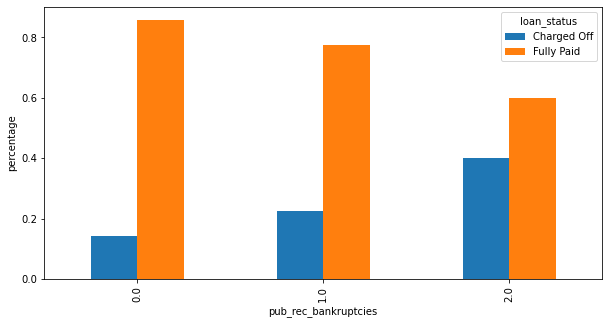

In [36]:
df.groupby(['pub_rec_bankruptcies']).loan_status.value_counts(normalize=True).unstack().plot.bar(figsize=(10, 5))
plt.ylabel('percentage')
plt.show()

Text(0, 0.5, 'percentage')

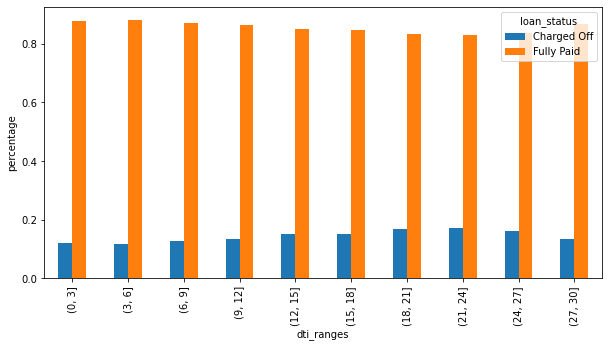

In [37]:
df['dti_ranges'] = pd.cut(x=df['dti'], bins=[0,3, 6, 9, 12, 15, 18, 21, 24, 27, 30])
dti_ranges = df.groupby(['dti_ranges'])['loan_status'].value_counts(normalize=True).unstack()
dti_ranges.plot.bar(figsize=(10,5))
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

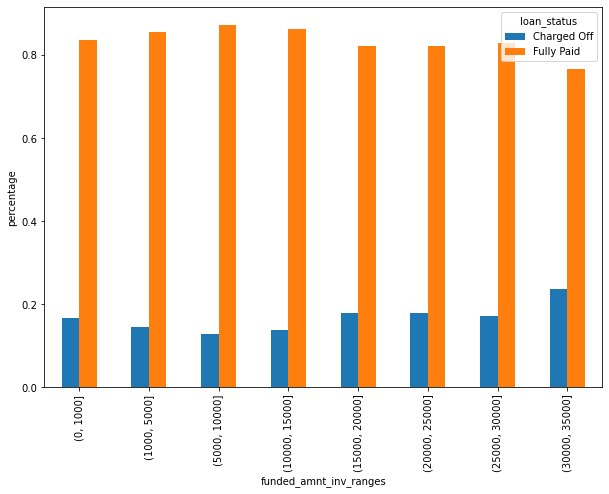

In [38]:
df['funded_amnt_inv_ranges'] = pd.cut(x=df['funded_amnt_inv'], bins=[0, 1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
loan_ranges = df.groupby(['funded_amnt_inv_ranges'])['loan_status'].value_counts(normalize=True).unstack()
loan_ranges.plot.bar(figsize=(10, 7))
plt.ylabel('percentage')

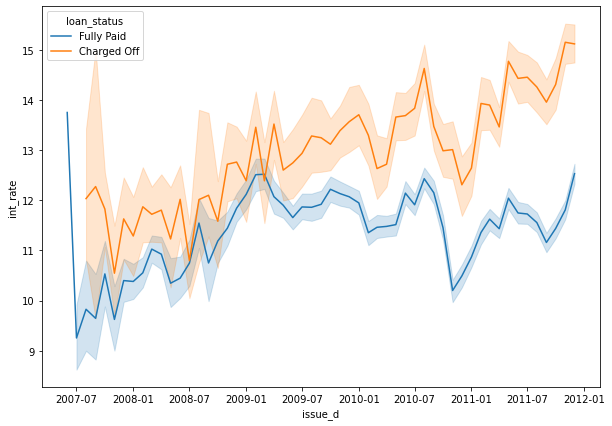

In [39]:
df.groupby(['issue_d'])['loan_status'].value_counts().unstack()
plt.figure(figsize=(10, 7))
sns.lineplot(x=df.issue_d, y=df.int_rate, hue=df.loan_status)
plt.show()

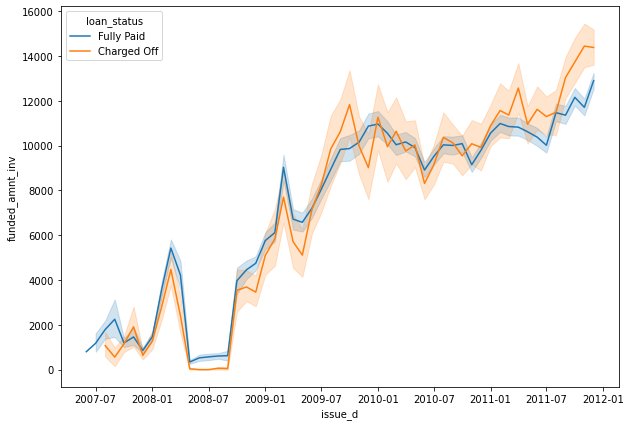

In [40]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=df.issue_d, y=df.funded_amnt_inv, hue=df.loan_status)
plt.show()

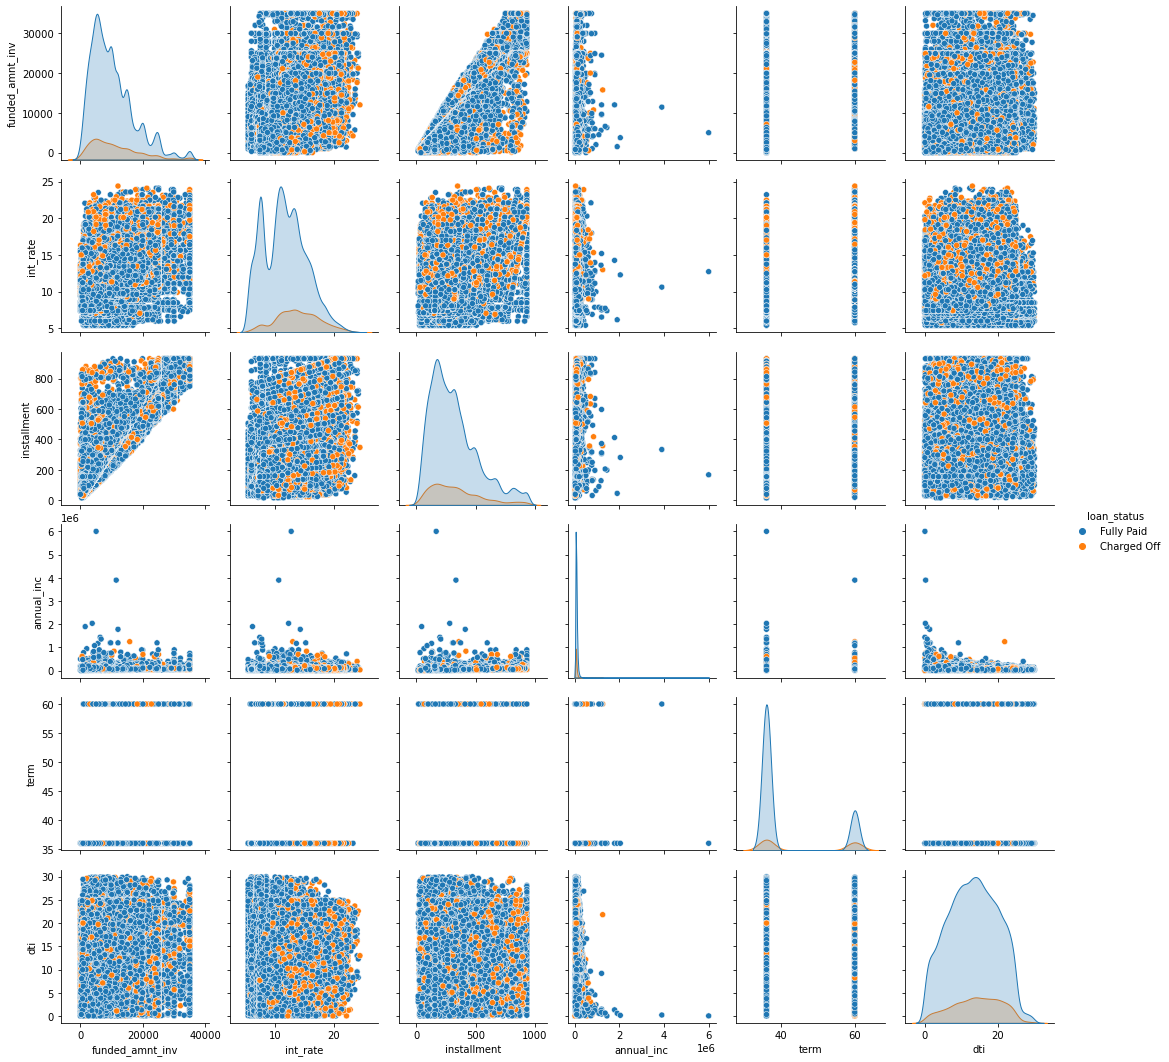

In [41]:
sns.pairplot(data=df[['funded_amnt_inv','int_rate','installment','annual_inc','loan_status', 'term', 'dti']], hue='loan_status')
plt.show()

# Feature Engineering
- Deriving new features from the data as per the understanding

In [42]:
def issued(x):
    if x==0:
        return 'Approved_amount'
    if x<0:
        return 'More_than_Approved_amount'
    if x>0:
        return 'Less_than_Approved_amount'

# Calculating the difference amount of funded_amnt and funded_amnt_inv 
# to check if issuing more/less amount than approved money has any effect on charged off
df['issued_flag'] = df['funded_amnt']-df['funded_amnt_inv']

df['issued_flag'] = df['issued_flag'].map(issued)

In [43]:
# calculation installment monthly income percentage
df['monthly_income'] =round(df['annual_inc']/12)
df['installment_monthly_income_prcnt'] =round((df['installment']/df['monthly_income'])*100,2)

### Analyzing features created

In [44]:
df['issued_flag'].value_counts(normalize=True)*100

Approved_amount             50.152
Less_than_Approved_amount   49.848
Name: issued_flag, dtype: float64

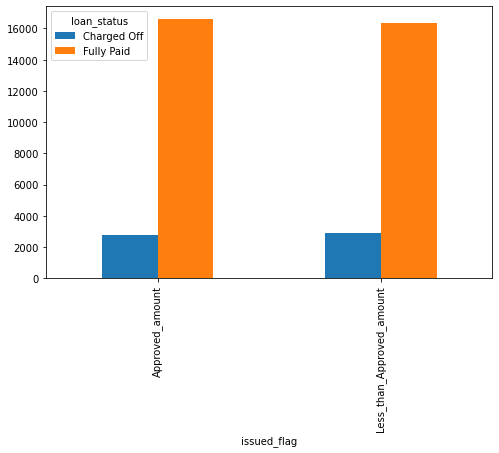

In [45]:
# Analyzing last payment flag
df.groupby(['issued_flag'])['loan_status'].value_counts().unstack().plot.bar(figsize=(8,5))
plt.show()

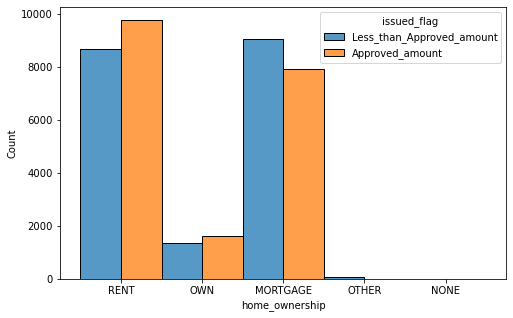

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(x='home_ownership',hue='issued_flag',data=df, multiple='dodge')
plt.show()

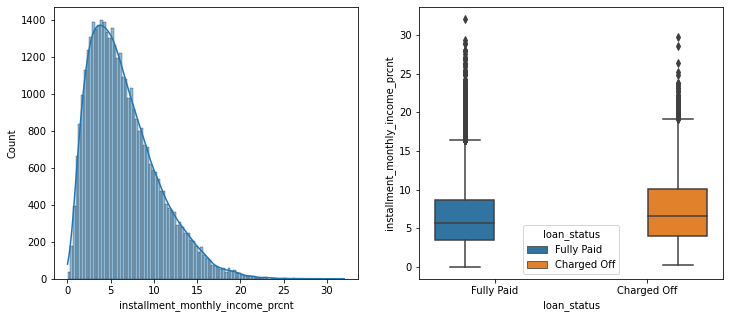

In [47]:
# Analyzing installment_monthly_income_percentage
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x=df['installment_monthly_income_prcnt'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x='loan_status',y='installment_monthly_income_prcnt', hue='loan_status', data=df)
plt.show()

# Conclusion:

- Interest rate - If the interest rate is high then there is a high chance of being charged off.
- Loan term - If the loan term is 60 months then there is more chance of being charged off.
- Grade: G, F, and E have high-interest rates and percentages of charged-off loans.
- If we look into subgrades F5 and G3 have more than 40 percent charged off loans.
- Employment Length: Employment length unknown has a high percentage of charged off.
- Loans taken for Small business has a high percentage of charge off's.
- NE State has the highest charged-off percentage(almost 60 percent).
- CA State has a large number of charged-off loans
- If pub_rec_bankruptcies is high then also there is more chance of being Charged off.
- Charge-off percentage is slightly high(~2-4) for DTI range is between 15 to 27.
- Charge-off is slightly high if the loan amount is greater than 30K.
- If the Installment to Monthly income percentage is more than ~8%, the chances of chargeoff increases

__The lending club should consider the above factors while approving the loan.__